C:\Users\shane\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\shane\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)

Bad key text.latex.preview in file C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\shane\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 15

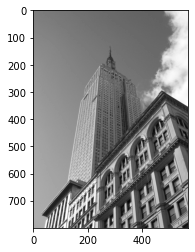

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')

In [2]:
local_region_size = 3 #size of local image regions W introduced in slide 6 in week 3 slides
kernel_size = 3 #kernel size of Sobel kernels used for calculating derivatives I_x and I_y
k = 0.04 #parameter k in side 6 in week 3 slides
threshold = 1000.0 #threshold theta introduced in slide 6 in week 3 slides 

In [3]:
img_gray = np.float32(img_gray)

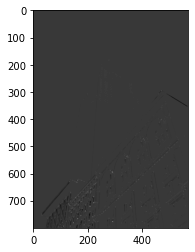

In [4]:
Harris_res_img = cv.cornerHarris(img_gray, local_region_size, kernel_size, k)
plt.imshow(Harris_res_img, 'gray')

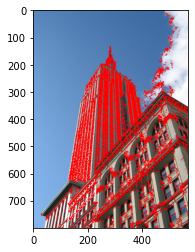

In [5]:
highlighted_colour = [0, 0, 255] # a colour is a combination of blue, green, red; red=[0,0,255]
highlighted_img = img.copy()
highlighted_img[Harris_res_img > threshold] = highlighted_colour
plt.imshow(highlighted_img[:,:,::-1]) # RGB-> BGR

In [6]:
count = 0
threshold = 0.001 * Harris_res_img.max()
print(threshold)
for i in range(len(Harris_res_img)):
    for j in range(len(Harris_res_img[i])):
        if Harris_res_img[i,j] > threshold:
            count = count + 1

print(count)

94003.416
39280


In [7]:
count = 0
threshold = 0.005 * Harris_res_img.max()
print(threshold)
for i in range(len(Harris_res_img)):
    for j in range(len(Harris_res_img[i])):
        if Harris_res_img[i,j] > threshold:
            count = count + 1

print(count)

470017.08
18163


In [8]:
count = 0
threshold = 0.010 * Harris_res_img.max()
print(threshold)
for i in range(len(Harris_res_img)):
    for j in range(len(Harris_res_img[i])):
        if Harris_res_img[i,j] > threshold:
            count = count + 1

print(count)

940034.16
10896


### Sift

In [9]:
sift = cv.xfeatures2d.SIFT_create()

In [10]:
# You need re-create img_gray as its previous version have been converted to float 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
kp = sift.detect(img_gray, None)

Number of detected keypoints: 2804


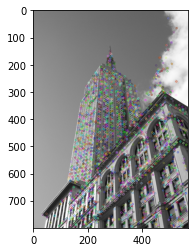

In [11]:
img_gray_kp = img_gray.copy()
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp)
plt.imshow(img_gray_kp)
print("Number of detected keypoints: %d" % (len(kp)))

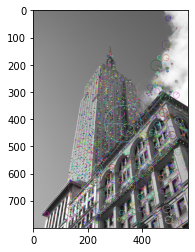

In [12]:
img_gray_kp = cv.drawKeypoints(img_gray, kp, img_gray_kp, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_gray_kp)

In [13]:
kp, des = sift.compute(img_gray, kp)

In [14]:
print(des.shape)

(2804, 128)


In [15]:
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another = cv.imread('fisherman.jpg')
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [16]:
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [17]:
print("The number of keypoints in img_gray is %d" % (len(des)))
print("The number of keypoints in img_45_gray is %d" % (len(des_45)))

The number of keypoints in img_gray is 2804
The number of keypoints in img_45_gray is 3290


----

In [22]:
!pip install hausdorff

  Created wheel for hausdorff: filename=hausdorff-0.2.6-py3-none-any.whl size=15209 sha256=bea079e24df2331aa359f78b9764bcc0330e045af141222eff37bbcef7756cb6
  Stored in directory: c:\users\shane\appdata\local\pip\cache\wheels\a1\59\b6\af93f52021bdd019edf4673aa46a2407a0e8339f968168df2c
Successfully built hausdorff


In [26]:
from hausdorff import hausdorff_distance
print(f"Hausdorff distance: {hausdorff_distance(des,des_45, distance='euclidean')}")

Hausdorff distance: 400.4697241989711


In [27]:
print(f"Hausdorff distance: {hausdorff_distance(des,des_zoomedout, distance='euclidean')}")

Hausdorff distance: 401.33651715237676


In [28]:
print(f"Hausdorff distance: {hausdorff_distance(des,des_another, distance='euclidean')}")

Hausdorff distance: 433.89630097524457


----

In [18]:
from scipy.spatial.distance import directed_hausdorff

In [19]:
directed_hausdorff(des,des_45)[0]

399.8762308514973

In [20]:
directed_hausdorff(des,des_zoomedout)[0]

401.33651715237676

In [21]:
directed_hausdorff(des,des_another)[0]

433.89630097524457